# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [45]:
Emory_ID = 2549526

print(str(Emory_ID))

2549526


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [46]:
# Write your answer here:

import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [47]:
# Write your own code here

df = pd.read_csv("data/bmi.csv")

bmi_calculator = lambda row: round(row['Weight'] / ((row['Height'] / 100) ** 2), 2)
df['BMI'] = list(map(bmi_calculator, df[['Weight', 'Height']].to_dict('records')))

print(df)


     Gender  Height  Weight  Index    BMI
0      Male     174      96      4  31.71
1      Male     189      87      2  24.36
2    Female     185     110      4  32.14
3    Female     195     104      3  27.35
4      Male     149      61      3  27.48
..      ...     ...     ...    ...    ...
495  Female     150     153      5  68.00
496  Female     184     121      4  35.74
497  Female     141     136      5  68.41
498    Male     150      95      5  42.22
499    Male     173     131      5  43.77

[500 rows x 5 columns]


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [48]:
# Write your own code here

df = pd.read_csv("data/wdi_2020.csv")

fn_upper = lambda x: x.upper()
df['countryname_upper'] = df['countryname'].apply(fn_upper)

original_countrynames = df['countryname'].tolist()
new_countrynames_upper = df['countryname_upper'].tolist()

print(f"Original 'countryname': {original_countrynames}")
print(f"Newly created 'countryname_upper': {new_countrynames_upper}")


Original 'countryname': ['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific 

<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [49]:
# Write your code here

df_sorted = df.sort_values(by='prop_urbanpopulation')
lowest_urban_population = df_sorted.head(5)

print("Subset of 5 countries with the lowest urban population:")
print(lowest_urban_population[['countryname', 'prop_urbanpopulation']])


Subset of 5 countries with the lowest urban population:
          countryname  prop_urbanpopulation
191  Papua New Guinea                13.345
34            Burundi                13.708
141     Liechtenstein                14.416
177             Niger                16.626
149            Malawi                17.427


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [50]:
# Write your own code here

import numpy as np

percentile_25 = np.nanpercentile(df['prop_urbanpopulation'], 25)
higher_than_25th_percentile = df.query('prop_urbanpopulation > @percentile_25')

print(f"Countries with prop_urbanpopulation higher than the 25th percentile ({percentile_25}):")
print(higher_than_25th_percentile[['countryname', 'prop_urbanpopulation']])


Countries with prop_urbanpopulation higher than the 25th percentile (42.492392115):
                    countryname  prop_urbanpopulation
2    Africa Western and Central             47.857831
3                       Albania             62.112000
4                       Algeria             73.733000
5                American Samoa             87.153000
6                       Andorra             87.916000
..                          ...                   ...
258               Venezuela, RB             88.279000
260       Virgin Islands (U.S.)             95.939000
261          West Bank and Gaza             76.719000
262                       World             56.063764
264                      Zambia             44.629000

[197 rows x 2 columns]


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


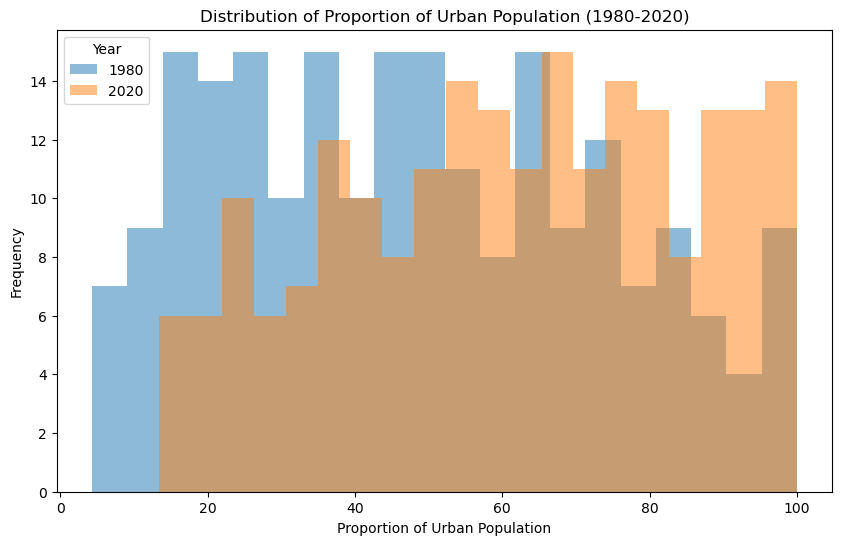

In [51]:
# Write your own code here

df = pd.read_csv("data/wdi_urban.csv")

years = df['year'].unique()
plt.figure(figsize=(10, 6))

for year in years:
    data_year = df[df['year'] == year]
    plt.hist(data_year['prop_urbanpopulation'], bins=20, alpha=0.5, label=str(year))

plt.xlabel('Proportion of Urban Population')
plt.ylabel('Frequency')
plt.title('Distribution of Proportion of Urban Population (1980-2020)')
plt.legend(title='Year')

plt.show()

# We can see how the distribution of proportion of urban populations has changed over time from 1980 to 2020. When the histograms overlap, this provides a clear visualization of the populations becoming less or more urbanized over the time frame.